In [2]:
import os
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [3]:
fruits =['apple','banana','blackberry','blueberry','grapes','pear','pineapple','strawberry','watermelon']
data_loc = '../data/full_numpy_bitmap_'

In [4]:
test = np.load(data_loc+fruits[0]+'.npy')

In [5]:
test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  11,  21,  12,   0,   0,   0,   0,   0,   0,   0,
         0,  92,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  91, 213, 253, 255, 255, 222,  95,   3,   0,   0,
         0,   0,   7, 255, 222,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  24, 190, 255, 196, 118, 100, 109, 196, 255, 121,
         0,   0,   0,   0,   0, 141,  35,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1, 185, 241,  94,   1,   0,   0,   0,   0,
        63,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  89, 255, 115, 133, 150,  37,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 207, 241, 252, 25

In [6]:
X = np.empty([0, 784])
y = np.empty([0])
i=0
for fruit in fruits:
    drawings = np.load(data_loc+fruit+'.npy')
    # drawings = drawings[0: 5000, :]

    labels = np.full(drawings.shape[0], i)

    X = np.concatenate((X, drawings), axis=0)
    y = np.append(y, labels)

    X /= 255.0
    i += 1

138825
apple


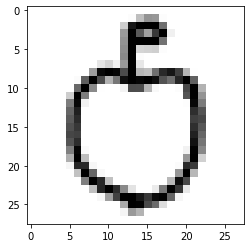

In [7]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(fruits[int(y[idx].item())])


In [8]:
y.shape[0]

1361209

In [9]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)


In [10]:
X_train_tf = tf.reshape(X_train, [-1,28,28,1])
X_test_tf = tf.reshape(X_test, [-1,28,28,1])
# X_train_28 = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
# X_test_28 = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# X_train /= 255.0
# X_test  /= 255.0

In [11]:
X_test_28[0][0]

NameError: name 'X_test_28' is not defined

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(fruits))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(fruits))
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [13]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test_tf.shape},{X_train_tf.shape}')
y_train.shape

(272242, 9).(1088967, 9)
(272242, 28, 28, 1),(1088967, 28, 28, 1)


TensorShape([1088967, 9])

In [19]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)


In [14]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3,3),
                               padding='same',
                               input_shape=X_train_tf.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [15]:
model.fit(x=X_train_tf, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=6)

Epoch 1/6
3829/3829 - 193s - loss: 1.6322 - accuracy: 0.3841 - val_loss: 1.5313 - val_accuracy: 0.4127
Epoch 2/6
3829/3829 - 188s - loss: 1.5318 - accuracy: 0.4138 - val_loss: 1.5313 - val_accuracy: 0.4127
Epoch 3/6
3829/3829 - 195s - loss: 1.5282 - accuracy: 0.4142 - val_loss: 1.5310 - val_accuracy: 0.4127
Epoch 4/6
3829/3829 - 191s - loss: 1.5280 - accuracy: 0.4142 - val_loss: 1.5304 - val_accuracy: 0.4127
Epoch 5/6
3829/3829 - 191s - loss: 1.5278 - accuracy: 0.4142 - val_loss: 1.5297 - val_accuracy: 0.4127
Epoch 6/6
3829/3829 - 191s - loss: 1.5320 - accuracy: 0.4141 - val_loss: 1.5298 - val_accuracy: 0.4127


In [16]:
score = model.evaluate(X_test_tf, y_test, verbose=0)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

Test accuracy: 41.23%


20416
grapes


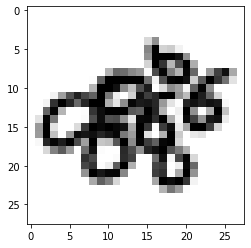

In [66]:
w



import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(fruits[int(y[idx].item())])


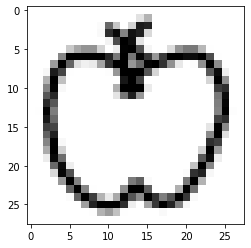

In [124]:
plt.imshow(X_test[150].reshape(28,28), cmap='binary')

In [125]:
testPic = X_test[150].reshape(1,28, 28,1).astype('float32')

In [100]:
testPic[0][0]

array([0.], dtype=float32)

In [81]:
X_train_28.shape[1:]

(28, 28, 1)

In [108]:
testPic[0][0][0]

array([0.], dtype=float32)

In [126]:
model.predict(testPic)

array([[1.3380073e-01, 2.7204397e-01, 1.1891171e-01, 1.1766133e-01,
        1.3962823e-01, 1.0592937e-01, 1.1197846e-01, 4.5252724e-05,
        9.0928364e-07]], dtype=float32)

In [18]:
zeros =np.zeros([28,28])

In [19]:
zeros_tf=tf.reshape(zeros, [-1,28,28,1])

In [129]:
model.predict(zeros.reshape(1,28, 28,1).astype('float32'))

array([[1.3380073e-01, 2.7204397e-01, 1.1891171e-01, 1.1766133e-01,
        1.3962823e-01, 1.0592937e-01, 1.1197846e-01, 4.5252724e-05,
        9.0928364e-07]], dtype=float32)

In [130]:
model.save('fruits.h5')

In [131]:
import tensorflowjs as tfjs

In [132]:
tfjs.converters.save_keras_model(model, './fruit/')

In [17]:
model25 = tf.keras.models.load_model('./model25/keras25.h5')

In [21]:
model25.predict(zeros_tf)

array([[0.02881973, 0.03212069, 0.02704347, 0.04075448, 0.03351706,
        0.03339065, 0.03598518, 0.03209847, 0.04918127, 0.02666775,
        0.06167682, 0.04947671, 0.04237669, 0.03382898, 0.03245797,
        0.06605408, 0.03269572, 0.04119892, 0.03403914, 0.08094659,
        0.01813395, 0.06315559, 0.02953459, 0.03277937, 0.04206613]],
      dtype=float32)

In [24]:
ones =np.ones([28,28])
ones_tf=tf.reshape(ones, [-1,28,28,1])

In [25]:
model25.predict(ones_tf)

array([[0.08269864, 0.00476623, 0.03011387, 0.02689508, 0.0278923 ,
        0.00414719, 0.02217058, 0.10640834, 0.01771225, 0.00706116,
        0.03351633, 0.03640307, 0.02590187, 0.10026402, 0.0521144 ,
        0.02345798, 0.01766381, 0.14927047, 0.04293193, 0.0179025 ,
        0.05021081, 0.05349954, 0.03344518, 0.00394509, 0.02960737]],
      dtype=float32)

In [27]:
test = np.load(data_loc+'bird'+'.npy')

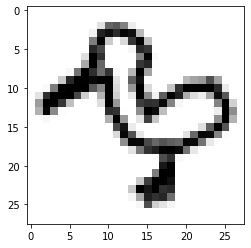

In [53]:
plt.imshow(test[15].reshape(28,28), cmap='binary')

In [54]:
model25.predict(tf.expand_dims(tf.reshape(test[15], [28,28,1]),0))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
model25.predict(test[15].reshape(1,28,28,1),3))

ValueError: in user code:

    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: [None, 28, 28, 1, 1]


In [44]:
test[15].reshape(1,28,28,1)[0][0]90.shape

SyntaxError: invalid syntax (<ipython-input-44-174ea1eeb889>, line 1)

In [50]:
model.predict(test[15])

ValueError: in user code:

    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\Chris\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 1]
